# Lecture 9 - Squeezed states of a quantum harmonic oscillator

Author: J. R. Johansson (robert@riken.jp), https://jrjohansson.github.io/

This lecture series was developed by J.R. Johannson. The original lecture notebooks are available [here](https://github.com/jrjohansson/qutip-lectures).

This is a slightly modified version of the lectures, to work with the current release of QuTiP. You can find these lectures as a part of the [qutip-tutorials repository](https://github.com/qutip/qutip-tutorials). This lecture and other tutorial notebooks are indexed at the [QuTiP Tutorial webpage](https://qutip.org/tutorials.html).

In [1]:
from base64 import b64encode

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation
from qutip import (about, basis, coherent, destroy, displace, expect, mesolve,
                   num, plot_wigner_fock_distribution, squeeze, variance)

%matplotlib inline

## Introduction

In quantum mechanics, each measurement of an observable (corresponding to an Hermitian operator) results in stochastic outcome that follows some probability distribution. The expectation value of the operator is the average of many measurement outcomes, and the standard deviation of the operator describes the uncertainty in the outcomes.

This uncertainty is intrinsic in quantum mechanics, and cannot be eliminated. The Heisenberg uncertainty principle describes the minumum uncertainly for pairs of noncommuting operators. For example, the operators such $x$ and $p$, which satisfy the commutation relation $[x, p] = i\hbar$, must always satisfy $(\Delta x) (\Delta p) >= \hbar/2$ .

A state that satisfies

$(\Delta x) (\Delta p) = \hbar/2$

is called a minimum uncertainty state, and a state for which, for example, 

$(\Delta x)^2 < \hbar/2$ 

is called a squeezed state. Note that in this case $(\Delta p)^2$ must be larger than $\hbar/2(\Delta x)^2$ for the Heisenberg relation to hold. Squeezing a quantum state so that the variance of one operator $x$ is reduced below the minimum uncertainty limit therefore necessarily amplify the variance of operators that do not commute with $x$, such as $p$.

For harmonic modes, squeezing of $x$ or $p$ is called quadrature squeezing, and it is probably the most common form of squeezing. 

In this QuTiP notebook we look at how expectation values and variances of the quadrature operators $x$ or $p$ of a single harmonic mode evolve in time when initially in different kinds of squeezed states. 

## Parameters

In [2]:
N = 35
w = 1 * 2 * np.pi  # oscillator frequency
tlist = np.linspace(0, 2, 31)  # periods

In [3]:
# operators
a = destroy(N)
n = num(N)
x = (a + a.dag()) / np.sqrt(2)
p = -1j * (a - a.dag()) / np.sqrt(2)

In [4]:
# the quantum harmonic oscillator Hamiltonian
H = w * a.dag() * a

In [5]:
c_ops = []

# uncomment to see how things change when disspation is included
# c_ops = [np.sqrt(0.25) * a]

## Functions for plotting

Since we want to repeat the same kind of calculation and visualization for several different states, we first define a few functions that we can reuse for each state later on.

In [6]:
def plot_expect_with_variance(N, op_list, op_title, states):
    """
    Plot the expectation value of an operator (list of operators)
    with an envelope that describes the operators variance.
    """

    fig, axes = plt.subplots(1, len(op_list), figsize=(14, 3))

    for idx, op in enumerate(op_list):

        e_op = expect(op, states)
        v_op = variance(op, states)

        axes[idx].fill_between(
            tlist, e_op - np.sqrt(v_op), e_op + np.sqrt(v_op), color="green",
            alpha=0.5)
        axes[idx].plot(tlist, e_op, label="expectation")
        axes[idx].set_xlabel("Time")
        axes[idx].set_title(op_title[idx])

    return fig, axes

In [7]:
def display_embedded_video(filename):
    video = open(filename, "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls alt="test" \
                src="data:video/x-m4v;base64,{0}">'.format(
        video_encoded
    )
    return HTML(video_tag)

## Coherent state

For reference, let's first look at the time evolution of a coherent state.

In [8]:
psi0 = coherent(N, 2.0)

In [9]:
result = mesolve(H, psi0, tlist, c_ops, [])

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00


20.0%. Run time:   0.00s. Est. time left: 00:00:00:00


30.0%. Run time:   0.00s. Est. time left: 00:00:00:00


40.0%. Run time:   0.01s. Est. time left: 00:00:00:00


50.0%. Run time:   0.01s. Est. time left: 00:00:00:00


60.0%. Run time:   0.01s. Est. time left: 00:00:00:00


70.0%. Run time:   0.01s. Est. time left: 00:00:00:00


80.0%. Run time:   0.01s. Est. time left: 00:00:00:00


90.0%. Run time:   0.01s. Est. time left: 00:00:00:00


100.0%. Run time:   0.01s. Est. time left: 00:00:00:00


Total run time:   0.01s


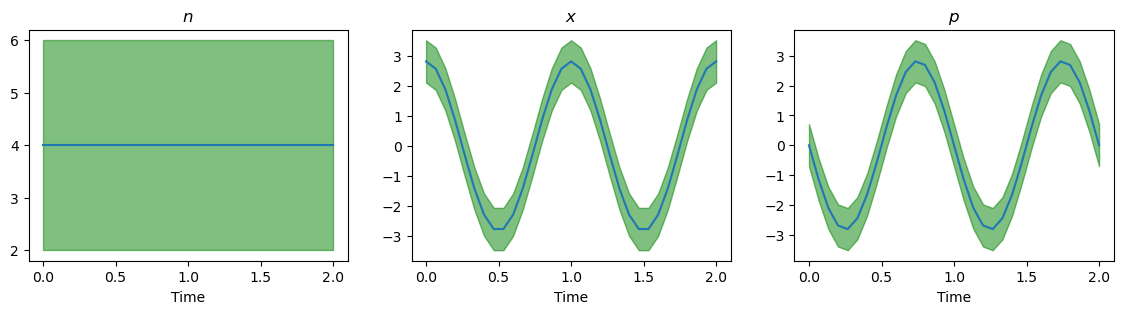

In [10]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"],
                          result.states);

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


def update(n):
    axes[0].cla()
    plot_wigner_fock_distribution(result.states[n], fig=fig, axes=axes)
    return axes[0].artists + axes[1].artists


anim = animation.FuncAnimation(fig, update, frames=len(result.states),
                               blit=True)

anim.save("/tmp/animation-coherent-state.mp4", fps=10, writer="ffmpeg")

plt.close(fig)

In [12]:
display_embedded_video("/tmp/animation-coherent-state.mp4")

## Squeezed vacuum

In [13]:
psi0 = squeeze(N, 1.0) * basis(N, 0)

In [14]:
result = mesolve(H, psi0, tlist, c_ops, [])

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00


20.0%. Run time:   0.00s. Est. time left: 00:00:00:00


30.0%. Run time:   0.01s. Est. time left: 00:00:00:00


40.0%. Run time:   0.01s. Est. time left: 00:00:00:00


50.0%. Run time:   0.01s. Est. time left: 00:00:00:00


60.0%. Run time:   0.01s. Est. time left: 00:00:00:00


70.0%. Run time:   0.01s. Est. time left: 00:00:00:00


80.0%. Run time:   0.01s. Est. time left: 00:00:00:00


90.0%. Run time:   0.02s. Est. time left: 00:00:00:00


100.0%. Run time:   0.02s. Est. time left: 00:00:00:00


Total run time:   0.02s


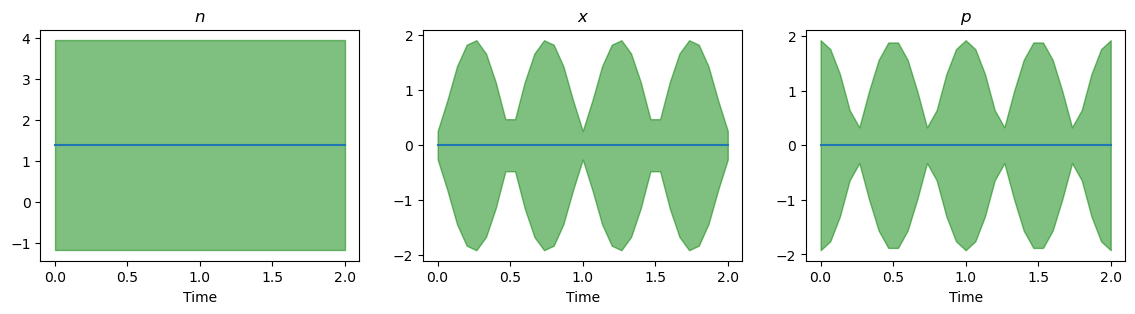

In [15]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"],
                          result.states);

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


def update(n):
    axes[0].cla()
    plot_wigner_fock_distribution(result.states[n], fig=fig, axes=axes)
    return axes[0].artists + axes[1].artists


anim = animation.FuncAnimation(fig, update, frames=len(result.states),
                               blit=True)

anim.save("/tmp/animation-squeezed-vacuum.mp4", fps=10, writer="ffmpeg")

plt.close(fig)

In [17]:
display_embedded_video("/tmp/animation-squeezed-vacuum.mp4")

## Squeezed coherent state

In [18]:
psi0 = (
    displace(N, 2) * squeeze(N, 1.0) * basis(N, 0)
)  # first squeeze vacuum and then displace

In [19]:
result = mesolve(H, psi0, tlist, c_ops, [])

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00


20.0%. Run time:   0.00s. Est. time left: 00:00:00:00


30.0%. Run time:   0.01s. Est. time left: 00:00:00:00


40.0%. Run time:   0.01s. Est. time left: 00:00:00:00


50.0%. Run time:   0.01s. Est. time left: 00:00:00:00


60.0%. Run time:   0.01s. Est. time left: 00:00:00:00


70.0%. Run time:   0.02s. Est. time left: 00:00:00:00


80.0%. Run time:   0.02s. Est. time left: 00:00:00:00


90.0%. Run time:   0.02s. Est. time left: 00:00:00:00


100.0%. Run time:   0.03s. Est. time left: 00:00:00:00


Total run time:   0.03s


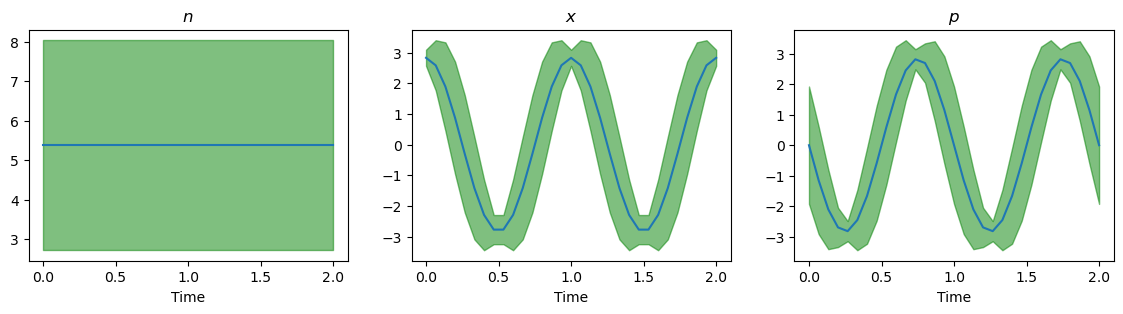

In [20]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"],
                          result.states);

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


def update(n):
    axes[0].cla()
    plot_wigner_fock_distribution(result.states[n], fig=fig, axes=axes)
    return axes[0].artists + axes[1].artists


anim = animation.FuncAnimation(fig, update, frames=len(result.states),
                               blit=True)

anim.save("/tmp/animation-squeezed-coherent-state.mp4", fps=10,
          writer="ffmpeg")

plt.close(fig)

In [22]:
display_embedded_video("/tmp/animation-squeezed-coherent-state.mp4")

### Software versions

In [23]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.0.0.dev0+afd160b
Numpy Version:      1.22.4
Scipy Version:      1.8.1
Cython Version:     0.29.33
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     2
BLAS Info:          Generic
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/work/qutip-tutorials/qutip-tutorials/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `